In [522]:
#in this version, I will try to get the real and fourier noisemap to match
import numpy as np
import matplotlib.pyplot as plt
import astropy as astro 
import pandas as pd
%matplotlib inline

In [523]:
from pylab import imshow
from numpy import random
from PIL import Image
from scipy.fftpack import fft 
from scipy.fftpack import ifft 
from numpy.linalg import inv
from __future__ import division

In [524]:
#hitsmap part 
Hitmap=np.random.rand(500,500) #generate random array and graph 
np.clip(Hitmap,0,1) 
#Hitmap=[[0.22,0.84,0.57],[0.41,0.06,0.72],[0.91,0.38,0.67]]

array([[0.46839746, 0.04285495, 0.71448414, ..., 0.84692641, 0.51704021,
        0.38661752],
       [0.43530696, 0.74862207, 0.05241032, ..., 0.7156203 , 0.60546914,
        0.92651056],
       [0.65427586, 0.87180109, 0.24530766, ..., 0.72752826, 0.74381351,
        0.12803295],
       ...,
       [0.24317973, 0.45612384, 0.06634996, ..., 0.51198947, 0.32745879,
        0.75814653],
       [0.31947407, 0.28411682, 0.65832755, ..., 0.0339642 , 0.67031992,
        0.93626818],
       [0.70872553, 0.63179389, 0.13269434, ..., 0.87854376, 0.53101284,
        0.04425087]])

Array of Hitmap [[0.46839746 0.04285495 0.71448414 ... 0.84692641 0.51704021 0.38661752]
 [0.43530696 0.74862207 0.05241032 ... 0.7156203  0.60546914 0.92651056]
 [0.65427586 0.87180109 0.24530766 ... 0.72752826 0.74381351 0.12803295]
 ...
 [0.24317973 0.45612384 0.06634996 ... 0.51198947 0.32745879 0.75814653]
 [0.31947407 0.28411682 0.65832755 ... 0.0339642  0.67031992 0.93626818]
 [0.70872553 0.63179389 0.13269434 ... 0.87854376 0.53101284 0.04425087]]


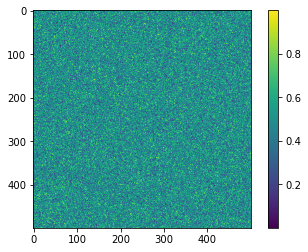

In [525]:
plt.colorbar(imshow(Hitmap))
imshow(Hitmap)
print('Array of Hitmap',Hitmap)

In [526]:
M=np.mean(Hitmap)
print('mean of Hitmap',M) 
length=len(Hitmap)
print('length of Hitmap',length)

mean of Hitmap 0.5002451884450281
length of Hitmap 500


In [527]:
#fourier and real diverges 
#Fourrier Space Amplitude

In [528]:
#A_noise

In [529]:
Spectrum=(np.abs(np.fft.fft(Hitmap)))
Inverse=(np.abs(inv(np.matrix(Hitmap)))) 

A_noise=Spectrum*Inverse 

In [530]:
#print(np.abs(np.fft.fft(Hitmap)))
#print(np.abs(inv(np.matrix(Hitmap))))
#print((np.abs(np.fft.fft(Hitmap)))*(np.abs(inv(np.matrix(Hitmap)))))
#imshow(((np.abs(np.fft.fft(Hitmap)))*(np.abs(inv(np.matrix(Hitmap))))))
#a=(np.abs(np.fft.fft(Hitmap))) * (np.abs(inv(np.matrix(Hitmap))))
#print('a',a)

In [531]:
#Spectrum=(np.fft.fft(Hitmap)) #fft of Hitmap
#Spectrum=np.fft.fft2(Hitmap) #fft2 of Hitmap
#Spectrum=np.fft.fftn(Hitmap) #fftn of Hitmap
#print('Spectrum',Spectrum)

#Inverse=np.abs(inv(np.matrix(Hitmap)))
#print('Inverse',Inverse)
#Transpose=np.transpose(Hitmap)

#A_noise= np.abs(Spectrum*Inverse)
#A_noise=np.abs(A_n*A_n)#squaring the amplitude
#print('A_noise',A_noise) 

In [532]:
#print('Spectrum',Spectrum)
#plt.colorbar(imshow(Spectrum))
#imshow(Spectrum)

In [533]:
#print('Inverse',Inverse)
#plt.colorbar(imshow(Inverse))
#imshow(Inverse)

A_noise [[ 402.23925629 2584.21083686  618.64808832 ... 1525.54097674
  3988.17085705 1652.3276028 ]
 [ 393.2764137  2578.97674766  611.52977192 ... 1512.39709109
  4002.54879145 1641.42233969]
 [ 407.36663489 2675.20998414  627.6145465  ... 1578.92905302
  4132.98953063 1717.4124942 ]
 ...
 [ 410.04300651 2727.0008543   647.76603544 ... 1596.12267436
  4207.27080335 1735.92269513]
 [ 418.69088341 2603.63435318  619.86485042 ... 1535.25414985
  4033.75164361 1671.9587668 ]
 [ 398.65051998 2639.84439625  645.66200301 ... 1551.22910102
  4111.44115551 1689.73488702]]


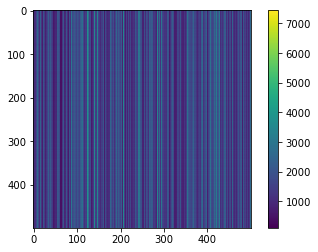

In [534]:
print('A_noise',A_noise)
plt.colorbar(imshow(A_noise))
imshow(A_noise)

In [535]:
def Noisemap(Hitmap,A_noise): 
    norm=np.random.normal(500,500)
    np.clip(norm,0,1) 
    #print('Norm',norm)
    #Inital = np.abs(A_noise * norm)
    Final = np.abs((np.fft.ifft(A_noise))*Hitmap)#inverse fourier transform to turn into real space
   # print('Inital',Inital)
    print('Final',Final)   
    plt.colorbar(imshow(Final))
    imshow(Final)
    #plt.savefig('noisemap.png') #saves figure in noisemap folder

Final [[7.55162820e+02 8.94204190e-01 4.65119230e+01 ... 6.25463844e+01
  3.36585976e+01 8.06709654e+00]
 [6.98634374e+02 1.57742756e+01 3.41975766e+00 ... 5.26994176e+01
  3.95066785e+01 1.95225782e+01]
 [1.09055582e+03 1.91168997e+01 1.66090084e+01 ... 5.59022019e+01
  5.03612690e+01 2.80751323e+00]
 ...
 [4.11637276e+02 1.01103683e+01 4.56499170e+00 ... 3.97811501e+01
  2.25297302e+01 1.68049553e+01]
 [5.21643580e+02 6.01689470e+00 4.34233760e+01 ... 2.55692767e+00
  4.42143942e+01 1.98278545e+01]
 [1.16795357e+03 1.38289539e+01 8.90667700e+00 ... 6.64392896e+01
  3.56425137e+01 9.68580518e-01]]


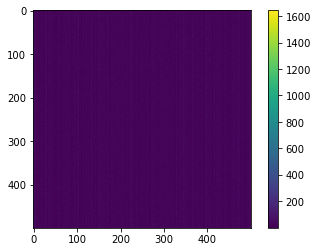

In [536]:
Noisemap(Hitmap,A_noise)